## INVESTMENT ANALYSIS ASSIGNMENT -- SPARK FUNDS LLC

###### Loading the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import numpy as np

###### Loading the Mapping File:

In [2]:
mapping = pd.read_csv('mapping.csv')
print(mapping.shape)
mapping.head(5)

(688, 10)


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


A total of 688 sub categories are mapped to 8 main sectors. We noticed that every sub-category is mapped to only 1 main sector.

### CHECKPOINT 1 : DATA CLEANING 1

###### Loading the Rounds2 file:

In [3]:
#Checking the encoding:

with open('rounds2.csv','rb') as rawdata:
    results = chardet.detect(rawdata.read(20000))
print(results)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [4]:
rounds2 = pd.read_csv('rounds2.csv',encoding = 'ISO-8859-1')
print(rounds2.shape)
rounds2.head()

(114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
#Changing the encoding to get the correct values for 'company_permalink' column.
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

###### Making all the values of 'company_permalink' lower case:

In [8]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


We are changing the case here so that the merge (that we will perform later with the companies file) does not contain any duplicate records due to different case. Also, this is required for counting the number of unique records present in the file.

In [15]:
print('Total records in rounds2 file : ',rounds2.shape[0])
print('\n')
print('List of Unique records present : ',rounds2['company_permalink'].unique())
print('\n')
print('Total Count of Unique Records Present : ',rounds2['company_permalink'].nunique())

Total records in rounds2 file :  114949


List of Unique records present :  ['/organization/-fame' '/organization/-qounter'
 '/organization/-the-one-of-them-inc-' ... '/organization/eron'
 '/organization/asys-2'
 '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic']


Total Count of Unique Records Present :  66368


###### Loading the Companies file:

In [12]:
#We are using the same encoding as the rounds2 file here:

companies = pd.read_csv('companies.csv',encoding = 'ISO-8859-1')
print(companies.shape)
companies.head()

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [13]:
#Changing the encoding to get the correct values for 'permalink' column.
companies['permalink'] = companies['permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

###### Making all the values of 'permalink' lower case:

In [17]:
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


We are changing the case here so that the merge (that we will perform later with the rounds2 file) does not contain any duplicate records due to different case. Also, this is required for counting the number of unique records present in the file.

In [18]:
print('Total Records Present in Companies File : ',companies.shape[0])
print('\n')
print('List of Unique Records Present : ',companies['permalink'].unique())
print('\n')
print('Total Count of Unique Records Present : ',companies['permalink'].nunique())

Total Records Present in Companies File :  66368


List of Unique Records Present :  ['/organization/-fame' '/organization/-qounter'
 '/organization/-the-one-of-them-inc-' ... '/organization/eron'
 '/organization/asys-2'
 '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic']


Total Count of Unique Records Present :  66368


In [21]:
#Getting a set of unique records for rounds2 file:
set_round = set(rounds2['company_permalink'].unique())

#Getting a set of unique records for company file:
set_companies = set(companies['permalink'].unique())

#Getting a set difference to see the count of records not common in both files:
diff = set_round ^ set_companies

print('Total Count of Records that are not common in both files : ',len(diff))

Total Count of Records that are not common in both files :  0


In [22]:
#Renaming the column for join purpose:
companies = companies.rename(columns = {'permalink':'company_permalink'})
companies.columns

Index(['company_permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

##### Merging the Dataframes:

The next step in the analysis is to merge the companies datafrmae with the rounds2 dataframe so as to create a master dataframe that is used for further analysis. 

We use column 'permalink' for the merging purpose because it is primary key of companies dataframe and a foreign key of rounds2 dataframe. Since all the unique records of rounds2 df is present in the companies df, we can do either a left join or an inner join (both will give the same result).

In [28]:
master_frame = rounds2.merge(companies , how = 'inner', on = 'company_permalink')
print('Total Records Present :',master_frame.shape)
master_frame.head()

Total Records Present : (114949, 15)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


The master data (master_frame) contain a total of 114949 records with 15 columns.

##### DATA CLEANING:

In [29]:
#Checking the count of records with null values:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

- 1) To make sure each investment record belongs to a Main Sector we need **category_list** to be not null
- 2) To check which countries are getting the higher funding amount, we need **country_code** and **raised_amount_usd** to be not null


**Finding Percentage of Missing values for the necessary columns**

In [95]:
column_list = ['category_list','country_code','raised_amount_usd']

for i in range(len(column_list)):
    print('Total Percentage of Null records in column : {0} is {1}%.'.format(column_list[i],round((master_frame[column_list[i]].isnull().sum()/master_frame.shape[0])*100,3)))

Total Percentage of Null records in column : category_list is 2.967%.
Total Percentage of Null records in column : country_code is 7.549%.
Total Percentage of Null records in column : raised_amount_usd is 17.39%.


Since the percentage of records with null values (for these three columns) is pretty small, we can choose to drop these records. It will not heavily impact our analysis result.

In [30]:
##### Cleaning raised_amount_usd:

master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]
print('Total Records Count after dropping null values : ',master_frame.shape)

Total Records Count after dropping null values :  (94959, 15)


In [31]:
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

We see a wide spread for the raised investment amount. We will further look into this later.

In [32]:
###### Cleaning category_list:
master_frame = master_frame[~master_frame['category_list'].isnull()]
print('Total Records Count after dropping null values : ',master_frame.shape)

Total Records Count after dropping null values :  (93915, 15)


In [33]:
###### Cleaning country_code:

master_frame = master_frame[~master_frame['country_code'].isnull()]
print('Total Records Count after dropping null values : ',master_frame.shape)

Total Records Count after dropping null values :  (88529, 15)


###### Verifying whether the three necessary columns have no null records:

In [24]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

**Checkpoint 1 Conclusion: Finished the data loading and cleaning step.**

### CHECKPOINT 2 : FUNDING TYPE ANALYSIS

- *Getting the different categories for the 'funding_round_type' column*

In [34]:
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

**Checking for outliers:**

C:\Users\NamrataT\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


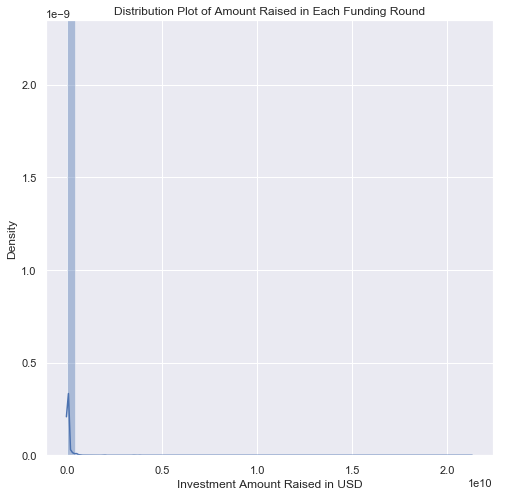

In [35]:
plt.figure(figsize = (8,8))
sns.set(font_scale=1.0)
sns.distplot(master_frame['raised_amount_usd'])
plt.xlabel('Investment Amount Raised in USD')
plt.title('Distribution Plot of Amount Raised in Each Funding Round')
plt.show()

We see that the distribution of column **raised_amount_usd** has a long tail in the right side and is heavily skewed in the left. This means that we have some outliers in this column. Hence, we will be using **Median** as the measure to calculate the most representative value of the investment amount for each funding type given.

###### Representative funding amount of each type:


In [38]:
#Group by on 'funding_round_type' and aggregate on 'raised_amount_usd'
master_frame_fundingtypeGroup = master_frame.groupby('funding_round_type')['raised_amount_usd'].agg(['sum','median','mean','count'])

#Reseting the index so that 'funding_round_type' becomes a column in this df:
master_frame_fundingtypeGroup.reset_index(inplace=True)

#Renaming the columns appropiately:
master_frame_fundingtypeGroup.rename(columns = {'funding_round_type':'Funding Type','sum':'Total Investments','count':'Count of Investments','mean':'Average Investments Amount','median':'Median Investment Amount'}, inplace=True)

#Sorting the values in descending order :
master_frame_fundingtypeGroup.sort_values(by='Count of Investments',ascending = False, inplace=True)

master_frame_fundingtypeGroup

,Funding Type,Total Investments,Median Investment Amount,Average Investments Amount,Count of Investments
13,venture,5.605234e+11,5000000.0,1.172422e+07,47809
11,seed,1.577471e+10,300000.0,7.477937e+05,21095
2,debt_financing,1.116928e+11,1096653.0,1.716765e+07,6506
0,angel,4.274925e+09,414906.0,9.715739e+05,4400
4,grant,8.750122e+09,225000.0,4.512698e+06,1939
8,private_equity,1.345680e+11,20000000.0,7.393849e+07,1820
12,undisclosed,2.137428e+10,1100000.0,1.589166e+07,1345
1,convertible_note,1.765086e+09,300000.0,1.337187e+06,1320
3,equity_crowdfunding,5.751649e+08,85000.0,5.098980e+05,1128
7,post_ipo_equity,3.951408e+10,12262852.5,6.607706e+07,598


In [39]:
#Getting the values for the 4 necessary funding type:
master_frame_fundingtypeGroup_2 = master_frame_fundingtypeGroup[master_frame_fundingtypeGroup['Funding Type'].isin(['venture','seed','angel','private_equity'])]

master_frame_fundingtypeGroup_2

,Funding Type,Total Investments,Median Investment Amount,Average Investments Amount,Count of Investments
13,venture,5.605234e+11,5000000.0,1.172422e+07,47809
11,seed,1.577471e+10,300000.0,7.477937e+05,21095
0,angel,4.274925e+09,414906.0,9.715739e+05,4400
8,private_equity,1.345680e+11,20000000.0,7.393849e+07,1820


As mentioned above we are using the **'Median'** as the measure to calculate the representative value for the investment amount for each of these 4 categories.

Along with the median lets try to get the 25th and 75th percentile values for each funding type to measure the spread of investment amount across these categories.

From the distribution plot above, it is clear that we have some outliers in the data.

In [92]:
#Filtering out the 4 necessary categories:
master_frame_fundingType = master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]
master_frame_fundingType.shape

(75124, 16)

##### Plotting a boxplot to check for outliers:

C:\Users\NamrataT\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


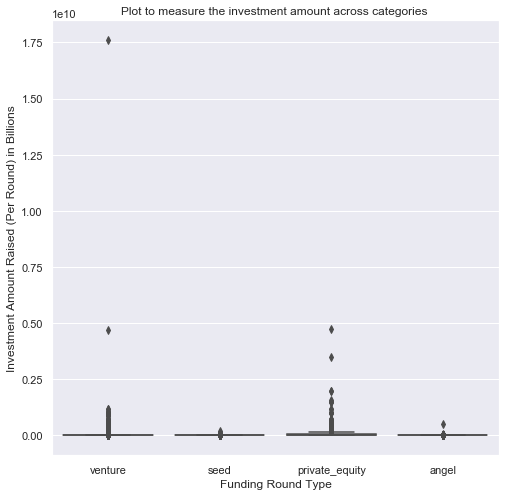

In [90]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.0)
sns.boxplot(master_frame_fundingType['funding_round_type'],master_frame_fundingType['raised_amount_usd'])
plt.xlabel('Funding Round Type')
plt.ylabel('Investment Amount Raised (Per Round) in Billions')
plt.title('Plot to measure the investment amount across categories ')
plt.show()

We definitely have some outliers for funding type 'venture' as the maximum value is approximately 17.6 Billion USD whereas the majority values lies below 2.5 Billion USD. So the mean we calculate will not be very accurate and hence we are not using it for determining the representative investment amount for the categories.

But the presence of outliers doesnt impact the lower and upper quartiles very much so we are not removing the outliers here. 

In [93]:
master_frame_fundingTypeGroup = master_frame_fundingType.groupby('funding_round_type')
master_frame_fundingTypeGroup['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.0,9.715739e+05,7.710904e+06,0.0,152756.5,414906.0,1000000.0,4.945120e+08
private_equity,1820.0,7.393849e+07,2.017765e+08,0.0,5000000.0,20000000.0,75762572.0,4.745460e+09
seed,21095.0,7.477937e+05,2.288318e+06,0.0,68816.5,300000.0,1000000.0,2.000000e+08
venture,47809.0,1.172422e+07,8.821571e+07,0.0,1600000.0,5000000.0,12000000.0,1.760000e+10


We see from the above table that :

- Funding type **'Venture'** has majority of the values lying between **1.6 Million** USD (Lower Quartile) and **12 Million** USD (Upper Quartile). With a Median value of **5 Million** USD.



- Funding type **'Private Equity'** has majority of the values lying between **5 Million** USD (Lower Quartile) and **75.7 Million** USD (Upper Quartile). With a Median value of **20 Million** USD.



- Funding type **'Angel'** has majority of the values lying between **152K** USD (Lower Quartile) and **1 Million** USD (Upper Quartile). With a Median value of **414K** USD.



- Funding type **'Seed'** has majority of the values lying between **68K** USD (Lower Quartile) and **1 Million** USD (Upper Quartile). With a Median value of **300K** USD.

Since Spark Funds wants to invest between 5 to 15 Million USD per investment round, Funding Type **Venture** is the most suitable one.

**Checkpoint 2 Conclusion: Funding Type 'Venture' is the most suitable choice for the Spark Funds**

### CHECKPOINT 3 : COUNTRY ANALYSIS

- For funding type 'Venture', we need to get the total investment amount that the countries have received.

In [95]:
#For Funding Type 'Venture', Grouping on Country_code and aggregating on 'raised_amount_usd':
country_fund = master_frame[master_frame['funding_round_type'] == 'venture'].groupby('country_code')['raised_amount_usd'].agg(['sum', 'count'])
country_fund.shape

(97, 2)

In [41]:
#Sorting the values in descending order :
country_fund.sort_values(by = 'sum', ascending=False,inplace=True)

#Selecting the top 9 countries:
top9 = pd.DataFrame(country_fund[0:9])

#Reseting the index so that the 'country_code' becomes a column in this df:
top9.reset_index(inplace=True)

#Renaming the columns appropiately:
top9.rename(columns = {'country_code':'Country','sum':'Total Investments','count':'Count of Investments'}, inplace=True)

###### Displaying the top 9 Countries:

For the chosen investment type (**Venture**), the dataframe **top9** contains the top nine countries (based on the total investment amount each country has received)

In [42]:
top9

,Country,Total Investments,Count of Investments
0,USA,4.200680e+11,35943
1,CHN,3.933892e+10,1548
2,GBR,2.007281e+10,2041
3,IND,1.426151e+10,819
4,CAN,9.482218e+09,1246
5,FRA,7.226851e+09,912
6,ISR,6.854350e+09,786
7,DEU,6.306922e+09,554
8,JPN,3.167647e+09,269


We see that **USA** (United States of America), **CHN** (China), **GBR** (Great Britain) has received the highest total funding. Since Spark Funds wants to invest *only in English-speaking countries*, we cannot include CHN (China). 

Hence, we need to consider the next country that has English as one of its official language. For that reason we choose **IND** (India) as the third suitable country.

**Checkpoint 3 Conclusion: For Funding Type 'Venture' the top 3 countries (that has received the highest amount of investment) are USA, GBR, IND**

### CHECKPOINT 4 : SECTOR ANALYSIS 1

End Goal: We need to map every sub-category of the master_frame df to a main sector using the mapping df.

In [99]:
mapping['category_list'].sort_values(ascending = True).head(10)

471                 0notechnology
472    0tural Language Processing
473              0tural Resources
474                     0vigation
1                              3D
2                     3D Printing
3                   3D Technology
22                       A0lytics
4                      Accounting
5                Active Lifestyle
Name: category_list, dtype: object

Some of the category names like 'Natural Language Processing' are wrongly entered as '0tural Language Processing'. Essentially the 'na' in the category names are replaced by a '0'.

In [100]:
#Fixing the 'category_list' column:
mapping['category_list'] = mapping['category_list'].str.replace('0','Na')
mapping['category_list'].sort_values(ascending = True).head(10)

1                     3D
2            3D Printing
3          3D Technology
22             ANalytics
4             Accounting
5       Active Lifestyle
6           Ad Targeting
7     Advanced Materials
8       Adventure Travel
9            Advertising
Name: category_list, dtype: object

In [101]:
#Getting a glimpse of the mapping data:
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


The first record maps a null category to a blank main category. This is a wrong record and hence removing it.

In [102]:
#Removing the null record:
mapping = mapping [~mapping['category_list'].isnull()]

In [48]:
#Getting a list of all the Main Sector Names:
list_cat_map = mapping.columns
list_cat_map

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [103]:
#Creating a new df that has each Category (Primary Sector) mapped to its Main Sector in a long format:
category_sector_map = pd.DataFrame()
cols = ['Primary Sector','Main Sector']

In [104]:
#Function that creates the above Dataframe:
def category_map(category):
    category = list(category)
    for i in range(len(category)):
        if category[i] == 1:
            return pd.Series([category[0].upper(),list_cat_map[i]])

In [105]:
%%timeit
category_sector_map[cols] = mapping.apply(category_map,axis = 1)

226 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [106]:
category_sector_map.head()

,Primary Sector,Main Sector
1,3D,Manufacturing
2,3D PRINTING,Manufacturing
3,3D TECHNOLOGY,Manufacturing
4,ACCOUNTING,"Social, Finance, Analytics, Advertising"
5,ACTIVE LIFESTYLE,Health


In [107]:
#Function that retrives the Primary Category Name from the 'category_list' column:
def createPrimarySector(category):
    category_list = category.split('|')
    if len(category_list) > 0:
        return category_list[0].upper()
    else:
        return category_list.upper()

###### Merging the master_frame with mapping df:

In [56]:
#Creating the 'Primary Sector' column by using above defined function:
master_frame['Primary Sector'] = master_frame['category_list'].apply(createPrimarySector)

#Merging the 'master_frame' with 'category_sector_map' using the common column 'Primary Sector':
master_frame_sector = pd.merge(master_frame,category_sector_map, how = 'inner', on = 'Primary Sector')
master_frame_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary Sector,Main Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,MEDIA,Entertainment


In [108]:
print('Total Records after Adding the Main Sector Column : ',master_frame_sector.shape)

Total Records after Adding the Main Sector Column :  (88447, 17)


In [110]:
print('Total Count of records that are not present in the merged dataframe : ',master_frame.shape[0] - master_frame_sector.shape[0])

Total Count of records that are not present in the merged dataframe :  82


82 records are left out when we used the inner join to merge the two df. Let's check these 82 records as to see why such a thing happened.

In [60]:
#Creating a temporary df just for checking the left out records:
temp = pd.merge(master_frame,category_sector_map, how = 'left', on = 'Primary Sector') 

#Since these categories are not present in 'category_sector_map' df so the 'Main Sector' column will be NaN for them:
temp = temp[temp['Main Sector'].isnull()]
temp

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary Sector,Main Sector
1995,/organization/adora-inc,/funding-round/086235eb44845d9bfdde633ce4c468b1,seed,NaN,30-08-2015,60000.0,Adora Inc.,http://www.getadora.com,Cause Marketing|Charity,operating,USA,AZ,Phoenix,Scottsdale,01-02-2014,CAUSE MARKETING,NaN
4947,/organization/apollo-commercial-real-estate-fi...,/funding-round/c2cb230111ce9a4acf6fd87b97b8741e,debt_financing,NaN,30-06-2014,50000000.0,Apollo Commercial Real Estate Finance,http://apolloreit.com,Real Estate Investors,ipo,USA,NY,New York City,New York,NaN,REAL ESTATE INVESTORS,NaN
6358,/organization/asia-translate,/funding-round/0e445561d485e211ccc409be15562dd9,venture,NaN,01-09-2009,20000.0,Asia Translate,http://www.asiatranslate.net,English-Speaking|Translation,operating,SGP,NaN,Singapore,Singapore,03-09-2009,ENGLISH-SPEAKING,NaN
9758,/organization/bioserie,/funding-round/0bff83a7d549f51caece02a8b8330bc7,seed,NaN,01-07-2014,40000.0,Bioserie,http://www.bioserie.com,Toys,operating,HKG,NaN,Hong Kong,Hong Kong,01-11-2009,TOYS,NaN
9759,/organization/bioserie,/funding-round/202cf002e7587e8142d8ede6bd529722,seed,NaN,01-12-2009,100000.0,Bioserie,http://www.bioserie.com,Toys,operating,HKG,NaN,Hong Kong,Hong Kong,01-11-2009,TOYS,NaN
9760,/organization/bioserie,/funding-round/612627b2ad15df609019e7532e36ea86,seed,NaN,01-07-2010,240000.0,Bioserie,http://www.bioserie.com,Toys,operating,HKG,NaN,Hong Kong,Hong Kong,01-11-2009,TOYS,NaN
10772,/organization/blurr-llc,/funding-round/43462148211db3ca3bc51993bdc0fa7a,seed,NaN,01-01-2013,2370000.0,Blurr,http://blurr.com/,Generation Y-Z|Photo Sharing|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,GENERATION Y-Z,NaN
13745,/organization/cartpay-co-,/funding-round/b4b7d1ac0a70d66f147c41b88eb1ab6d,angel,NaN,01-12-2014,30000.0,CartPay Co.,http://cartpay.co,Enterprise Hardware|Retail,operating,RUS,66,St. Petersburg,Saint Petersburg,01-06-2014,ENTERPRISE HARDWARE,NaN
13746,/organization/cartpay-co-,/funding-round/fbe5ea27c9c23ca0075a0f2bd1be5fba,venture,NaN,01-03-2015,50000.0,CartPay Co.,http://cartpay.co,Enterprise Hardware|Retail,operating,RUS,66,St. Petersburg,Saint Petersburg,01-06-2014,ENTERPRISE HARDWARE,NaN
13751,/organization/carusele,/funding-round/500d43468b8afcf9753f39243c97e93b,seed,NaN,13-03-2015,250000.0,Carusele,http://carusele.com,Social Media Advertising|Social Media Marketing,operating,USA,NC,Raleigh,Raleigh,01-01-2015,SOCIAL MEDIA ADVERTISING,NaN


In [61]:
print(category_sector_map[category_sector_map['Primary Sector'] == 'CHARITY'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'TRANSLATION'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'PHOTO SHARING'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'RETAIL'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'SOCIAL MEDIA MARKETING'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'SERVICE PROVIDERS'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'WEB DESIGN'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'CONSTRUCTION'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'ENTERPRISE SOFTWARE'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'PEER-TO-PEER'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'INNOVATION MANAGEMENT'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'SOCIAL MEDIA'])
print('================================================')
print(category_sector_map[category_sector_map['Primary Sector'] == 'SEMICONDUCTORS'])
print('================================================')

   Primary Sector                              Main Sector
98        CHARITY  Social, Finance, Analytics, Advertising
    Primary Sector Main Sector
651    TRANSLATION      Others
    Primary Sector    Main Sector
523  PHOTO SHARING  Entertainment
    Primary Sector                              Main Sector
570         RETAIL  Social, Finance, Analytics, Advertising
             Primary Sector                              Main Sector
613  SOCIAL MEDIA MARKETING  Social, Finance, Analytics, Advertising
        Primary Sector Main Sector
590  SERVICE PROVIDERS      Others
    Primary Sector                 Main Sector
678     WEB DESIGN  News, Search and Messaging
    Primary Sector    Main Sector
136   CONSTRUCTION  Manufacturing
          Primary Sector Main Sector
249  ENTERPRISE SOFTWARE      Others
    Primary Sector                 Main Sector
512   PEER-TO-PEER  News, Search and Messaging
            Primary Sector                              Main Sector
370  INNOVATION MANAGEMENT

Upon analysis we found out that the 82 records are not getting merged due to following reason:

- We are considering only the First Category before the pipeline (|) as the Primary Sector. This is a business decision. 



- For these 82 records the First Category is not present in the Category_sector_map df. Instead the Second Category (or the one following the pipe) is present. But we are not considering the second category as a value in 'Primary Sector' column. Hence, these records are getting rejected.

In [62]:
#Final Df for this checkpoint:
master_frame_sector.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary Sector,Main Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment


**Checkpoint 4 Conclusion: The merged data frame contains each primary sector mapped to its main sector. Primary Sector and Main Sector are present as individual columns in the merged data frame. **

### CHECKPOINT 5 : SECTOR ANALYSIS 2

END GOAL: To find out the most heavily invested Main Sectors in each of the three chosen countries (USA, GBR, IND) for funding type Venture and investments range of 5-15 Million USD.

###### Creating separate DF for each country with funding type as 'Venture' and Investment amount between 5-15 Million USD:

In [111]:
D1_USA = master_frame_sector[(master_frame_sector['country_code'] == 'USA') & (master_frame_sector['funding_round_type'] == 'venture') & (master_frame_sector['raised_amount_usd']>=5000000) & (master_frame_sector['raised_amount_usd']<=15000000)]
D2_GBR = master_frame_sector[(master_frame_sector['country_code'] == 'GBR') & (master_frame_sector['funding_round_type'] == 'venture') & (master_frame_sector['raised_amount_usd']>=5000000) & (master_frame_sector['raised_amount_usd']<=15000000)]
D3_IND = master_frame_sector[(master_frame_sector['country_code'] == 'IND') & (master_frame_sector['funding_round_type'] == 'venture') & (master_frame_sector['raised_amount_usd']>=5000000) & (master_frame_sector['raised_amount_usd']<=15000000)]

In [116]:
#Printing the head for 1 DF as an example:
D1_USA.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary Sector,Main Sector
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,MEDIA,Entertainment
31,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,MEDIA,Entertainment


In [113]:
print('Total Records present for Country USA : ',D1_USA.shape[0])
print('Total Records present for Country GBR : ',D2_GBR.shape[0])
print('Total Records present for Country IND : ',D3_IND.shape[0])

Total Records present for Country USA :  12063
Total Records present for Country GBR :  621
Total Records present for Country IND :  328


### Observations for the Top English Speaking Country : USA

In [114]:
total_investment_count_USA = D1_USA['raised_amount_usd'].count()
total_investment_amount_USA = D1_USA['raised_amount_usd'].sum()
print('Total number of Investments (count) : ',total_investment_count_USA)
print('Total amount of investment (USD) : ',total_investment_amount_USA)

Total number of Investments (count) :  12063
Total amount of investment (USD) :  107757097294.0


###### Calculating the total number of investments (count) and the total amount of investments (sum) in each Main Sector of USA:

In [66]:
sector_investmentCount_USA = D1_USA.pivot_table(values = 'raised_amount_usd', index = ['Main Sector'], aggfunc = {'count','sum'}).sort_values(by = 'count', ascending = False)
sector_investmentCount_USA

,count,sum
Main Sector,,
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10
Cleantech / Semiconductors,2350,2.163343e+10
"News, Search and Messaging",1583,1.397157e+10
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
Entertainment,591,5.099198e+09
Automotive & Sports,167,1.454104e+09


The conclusion from the above table is as follows:

- Top Sector name (no. of investment-wise) : **Others**. It received a total of *2950* number of investments (count) and a total funding of *26.3* Billion USD.


- Second Sector name (no. of investment-wise) : **Social, Finance, Analytics, Advertising**. It received a total of *2714* number of investments (count) and a total funding of *23.8* Billion USD.


- Third Sector name (no. of investment-wise) : **Cleantech / Semiconductors**. It received a total of *2350* number of investments (count) and a total funding of *21.6* Billion USD.

###### Finding the company name that received the highest invesment in the top sector (Others):

Each company sometimes receives investments in multiple rounds. Grouping on the ['company_permalink','name'] and aggregating on 'raised_amount_usd' to get the name of the company that has received the highest aggregated investment amount.

In [118]:
#Filtering out the Top Sector:
topSectorCount_USA = D1_USA[D1_USA['Main Sector']== "Others"]

#Getting the name of the company with highest investment amount received:
company_topSectorCount_USA =topSectorCount_USA.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1)
print(company_topSectorCount_USA)

company_permalink          name       
/organization/virtustream  Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64


For USA and in the sector 'Others', the company **'Virtustream'** received the highest investment amount.

###### Finding the company name that received the highest invesment in the second sector (Social, Finance, Analytics, Advertising):

In [119]:
#Filtering out the Second Sector:
no2SectorCount_USA = D1_USA[D1_USA['Main Sector']== "Social, Finance, Analytics, Advertising"]

#Getting the name of the company with highest investment amount received:
company_no2SectorCount_USA =no2SectorCount_USA.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1)
print(company_no2SectorCount_USA)

company_permalink          name                           
/organization/shotspotter  SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64


For USA and in the sector 'Social, Finance, Analytics, Advertising', the company **'SST Inc. (Formerly ShotSpotter)'** received the highest investment amount.

### Observations for the Second English Speaking Country : GBR

In [120]:
total_investment_count_GBR = D2_GBR['raised_amount_usd'].count()
total_investment_amount_GBR = D2_GBR['raised_amount_usd'].sum()
print('Total number of Investments (count) : ',total_investment_count_GBR)
print('Total amount of investment (USD) : ',total_investment_amount_GBR)

Total number of Investments (count) :  621
Total amount of investment (USD) :  5379078691.0


###### Calculating the total number of investments (count) and the total amount of investments (sum) in each Main Sector of GBR:

In [70]:
sector_investmentCount_GBR = D2_GBR.pivot_table(values = 'raised_amount_usd', index = ['Main Sector'], aggfunc = {'count','sum'}).sort_values(by = 'count', ascending = False)
sector_investmentCount_GBR

,count,sum
Main Sector,,
Others,147,1.283624e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09
Cleantech / Semiconductors,130,1.163990e+09
"News, Search and Messaging",73,6.157462e+08
Entertainment,56,4.827847e+08
Manufacturing,42,3.619403e+08
Health,24,2.145375e+08
Automotive & Sports,16,1.670516e+08


The conclusion from the above table is as follows:

- Top Sector name (no. of investment-wise) : **Others**. It received a total of *147* number of investments (count) and a total funding of *1.2* Billion USD.


- Second Sector name (no. of investment-wise) : **Social, Finance, Analytics, Advertising**. It received a total of *133* number of investments (count) and a total funding of *1.08* Billion USD.


- Third Sector name (no. of investment-wise) : **Cleantech / Semiconductors**. It received a total of *130* number of investments (count) and a total funding of *1.16* Billion USD.

###### Finding the company name that received the highest invesment in the top sector (Others):

In [71]:
SectorCount_GBR = D2_GBR[D2_GBR['Main Sector']== "Others"]
company_topSectorCount_GBR =SectorCount_GBR.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1)
print(company_topSectorCount_GBR)

company_permalink             name          
/organization/electric-cloud  Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64


For GBR and in the sector 'Others', the company **'Electric Cloud'** received the highest investment amount.

###### Finding the company name that received the highest invesment in the second sector (Social, Finance, Analytics, Advertising):

In [72]:
no2SectorCount_GBR = D2_GBR[D2_GBR['Main Sector']== "Social, Finance, Analytics, Advertising"]
company_no2SectorCount_GBR =no2SectorCount_GBR.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1)
print(company_no2SectorCount_GBR)

company_permalink                    name                 
/organization/celltick-technologies  Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64


For GBR and in the sector 'Social, Finance, Analytics, Advertising', the company **'Celltick Technologies'** received the highest investment amount.

### Observations for the Third English Speaking Country : IND

In [121]:
total_investment_count_IND = D3_IND['raised_amount_usd'].count()
total_investment_amount_IND = D3_IND['raised_amount_usd'].sum()
print('Total number of Investments (count) : ',total_investment_count_IND)
print('Total amount of investment (USD) : ',total_investment_amount_IND)

Total number of Investments (count) :  328
Total amount of investment (USD) :  2949543602.0


###### Calculating the total number of investments (count) and the total amount of investments (sum) in each Main Sector of IND:

In [74]:
sector_investmentCount_IND = D3_IND.pivot_table(values = 'raised_amount_usd', index = ['Main Sector'], aggfunc = {'count','sum'}).sort_values(by = 'count', ascending = False)
sector_investmentCount_IND

,count,sum
Main Sector,,
Others,110,1.013410e+09
"Social, Finance, Analytics, Advertising",60,5.505496e+08
"News, Search and Messaging",52,4.338345e+08
Entertainment,33,2.808300e+08
Manufacturing,21,2.009000e+08
Cleantech / Semiconductors,20,1.653800e+08
Health,19,1.677400e+08
Automotive & Sports,13,1.369000e+08


The conclusion from the above table is as follows:

- Top Sector name (no. of investment-wise) : **Others**. It received a total of *110* number of investments (count) and a total funding of *1.01* Billion USD.


- Second Sector name (no. of investment-wise) : **Social, Finance, Analytics, Advertising**. It received a total of *60* number of investments (count) and a total funding of *550* Million USD.


- Third Sector name (no. of investment-wise) : **News, Search and Messaging**. It received a total of *52* number of investments (count) and a total funding of *433* Million USD.

###### Finding the company name that received the highest invesment in the top sector (Others):

In [75]:
SectorCount_IND = D3_IND[D3_IND['Main Sector']== "Others"]
company_topSectorCount_IND =SectorCount_IND.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1)
print(company_topSectorCount_IND)

company_permalink           name        
/organization/firstcry-com  FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64


For IND and in the sector 'Others', the company **'FirstCry.com'** received the highest investment amount.

###### Finding the company name that received the highest invesment in the second sector (Social, Finance, Analytics, Advertising):

In [76]:
SectorCount_IND = D3_IND[D3_IND['Main Sector']== "Social, Finance, Analytics, Advertising"]
company_no2SectorCount_IND =SectorCount_IND.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1)
print(company_no2SectorCount_IND)

company_permalink              name           
/organization/manthan-systems  Manthan Systems    50700000.0
Name: raised_amount_usd, dtype: float64


For IND and in the sector 'Social, Finance, Analytics, Advertising', the company **'Manthan Systems'** received the highest investment amount.

**Checkpoint 5 Conclusion: **

- We calculated the total number of investments (count) and the total amount of investment for each of the three chosen countries (USA, GBR, IND) for funding type 'Venture' with investment amount between 5-15M USD. 


- For all three countries the top 2 sector is same : 'Others', and 'Social, Finance, Analytics, Advertising'. In USA and GBR the third top sector is 'Cleantech / Semiconductors', while in IND the third top sector is 'News, Search and Messaging'.

### CHECKPOINT 6 : PLOTS

#### PLOT 1:

END GOAL : A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [77]:
master_frame_fundingtypeGroup

,Funding Type,Total Investments,Median Investment Amount,Average Investments Amount,Count of Investments
13,venture,5.605234e+11,5000000.0,1.172422e+07,47809
11,seed,1.577471e+10,300000.0,7.477937e+05,21095
2,debt_financing,1.116928e+11,1096653.0,1.716765e+07,6506
0,angel,4.274925e+09,414906.0,9.715739e+05,4400
4,grant,8.750122e+09,225000.0,4.512698e+06,1939
8,private_equity,1.345680e+11,20000000.0,7.393849e+07,1820
12,undisclosed,2.137428e+10,1100000.0,1.589166e+07,1345
1,convertible_note,1.765086e+09,300000.0,1.337187e+06,1320
3,equity_crowdfunding,5.751649e+08,85000.0,5.098980e+05,1128
7,post_ipo_equity,3.951408e+10,12262852.5,6.607706e+07,598


As mentioned before, there are outliers present in the data. Hence, we will be using Median as the measure to decide the representative amount for the investment for each funding type categories.

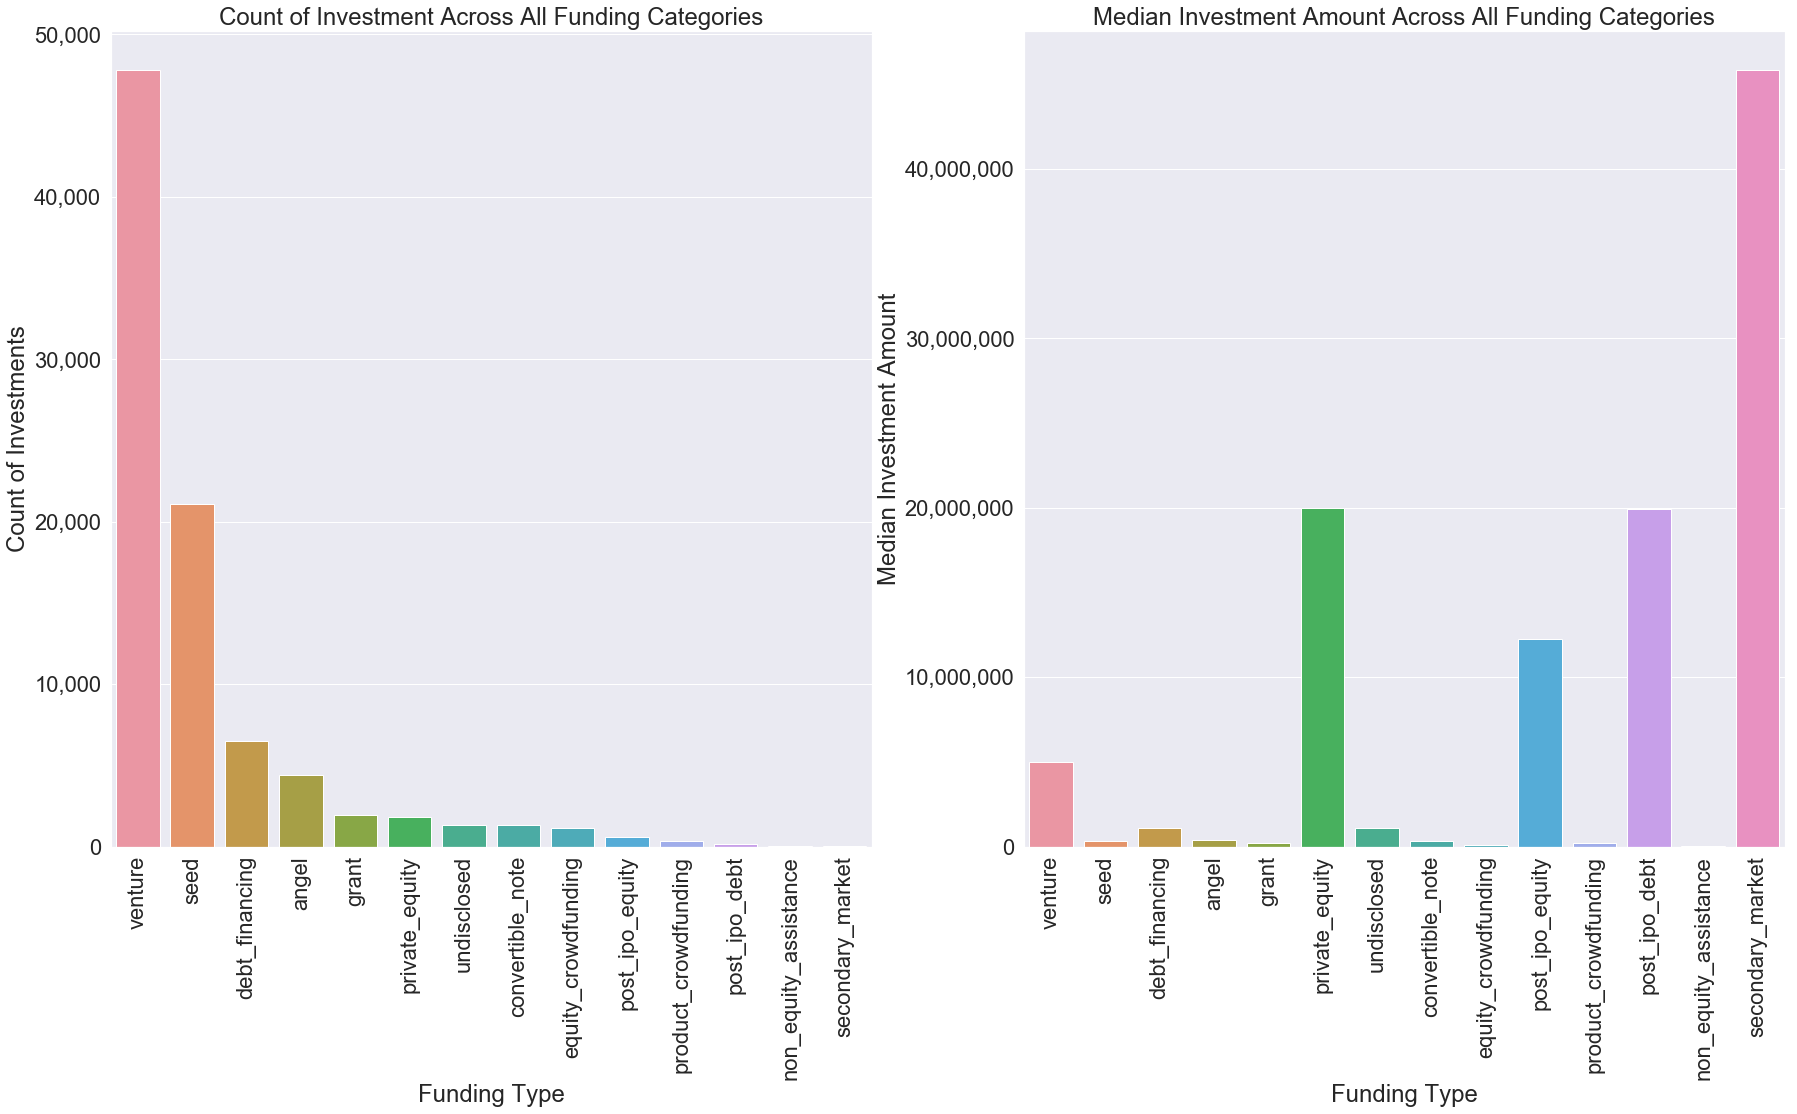

In [78]:
plt.figure(figsize = (30,15))
sns.set(font_scale=2.0)
plt.subplot(121)
plt1= sns.barplot(x = 'Funding Type', y = 'Count of Investments', data = master_frame_fundingtypeGroup)
plt1.get_yaxis().get_major_formatter().set_scientific(False)
plt1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation = 90)
plt.title('Count of Investment Across All Funding Categories')

plt.subplot(122)
plt1 = sns.barplot(x = 'Funding Type', y = 'Median Investment Amount', data = master_frame_fundingtypeGroup)
plt1.get_yaxis().get_major_formatter().set_scientific(False)
plt1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation = 90)
plt.title('Median Investment Amount Across All Funding Categories')
plt.show()

- The above plots show the count of investments (left) and the median amount invested (right) across all the funding types.

- We notice that the funding type **'Venture' received the highest number of investments.**

Since we are more interested in analysing the 4 specific funding types, let's plot them and see:

In [79]:
master_frame_fundingtypeGroup_2

,Funding Type,Total Investments,Median Investment Amount,Average Investments Amount,Count of Investments
13,venture,5.605234e+11,5000000.0,1.172422e+07,47809
11,seed,1.577471e+10,300000.0,7.477937e+05,21095
0,angel,4.274925e+09,414906.0,9.715739e+05,4400
8,private_equity,1.345680e+11,20000000.0,7.393849e+07,1820


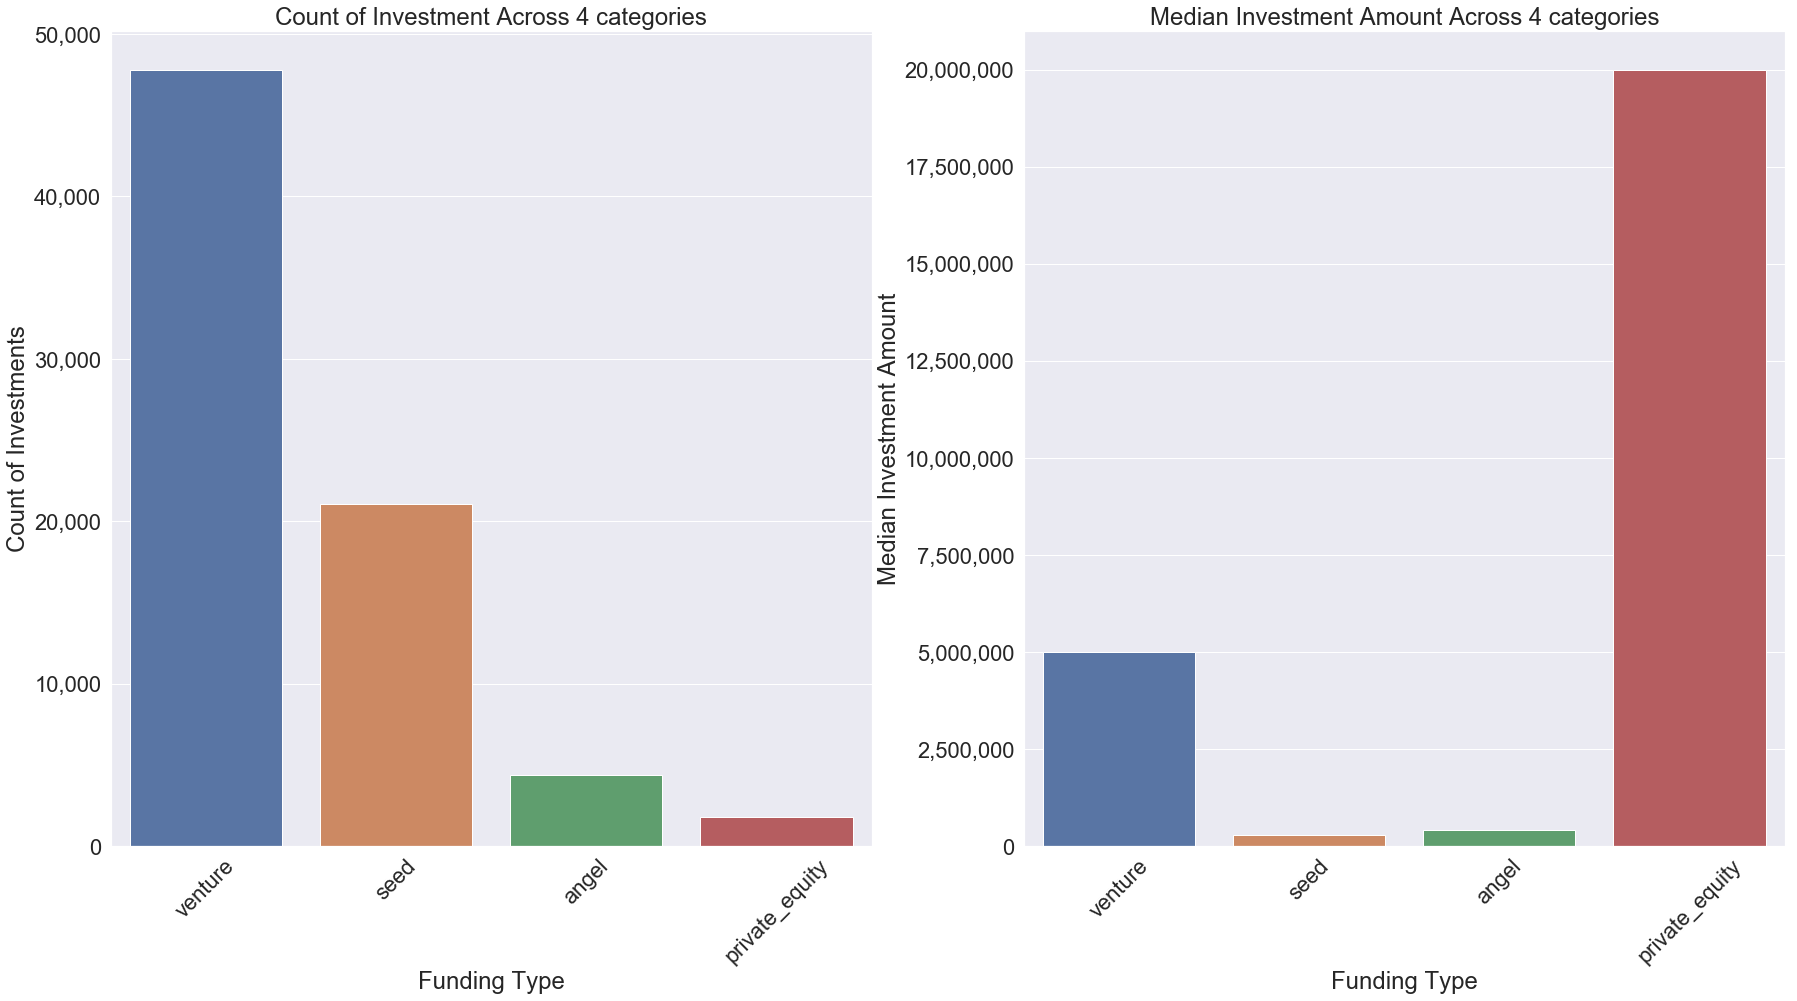

In [80]:
plt.figure(figsize = (30,15))
sns.set(font_scale=2.0)
plt.subplot(121)
plt1 = sns.barplot(x = 'Funding Type', y = 'Count of Investments', data = master_frame_fundingtypeGroup_2)
plt1.get_yaxis().get_major_formatter().set_scientific(False)
plt1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation = 45)
plt.title('Count of Investment Across 4 categories')

plt.subplot(122)
plt1 = sns.barplot(x = 'Funding Type', y = 'Median Investment Amount', data = master_frame_fundingtypeGroup_2)
plt1.get_yaxis().get_major_formatter().set_scientific(False)
plt1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation = 45)
plt.title('Median Investment Amount Across 4 categories')
plt.show()

- The above plots show the count of investments (left) and the median amount invested (right) across funding types as 'Venture', 'Seed', 'Angel' and 'Private Equity'.


- We notice that the funding type 'Venture' received the highest number of investments. The median amount received by 'Venture' is 5 Million USD. Spark Funds wants to invest between 5-15 Million USD (per round), so 'Venture' is the most suitable option for investing.

**PLOT 1 Conclusion:**

- **Funding type 'Venture' is most suitable for investment for Spark Funds.**

#### PLOT 2:

END GOAL: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.   

Since we have already chosen the suitable funding type as 'Venture', all the plots below are for records of 'Venture' only.

In [81]:
top9

,Country,Total Investments,Count of Investments
0,USA,4.200680e+11,35943
1,CHN,3.933892e+10,1548
2,GBR,2.007281e+10,2041
3,IND,1.426151e+10,819
4,CAN,9.482218e+09,1246
5,FRA,7.226851e+09,912
6,ISR,6.854350e+09,786
7,DEU,6.306922e+09,554
8,JPN,3.167647e+09,269


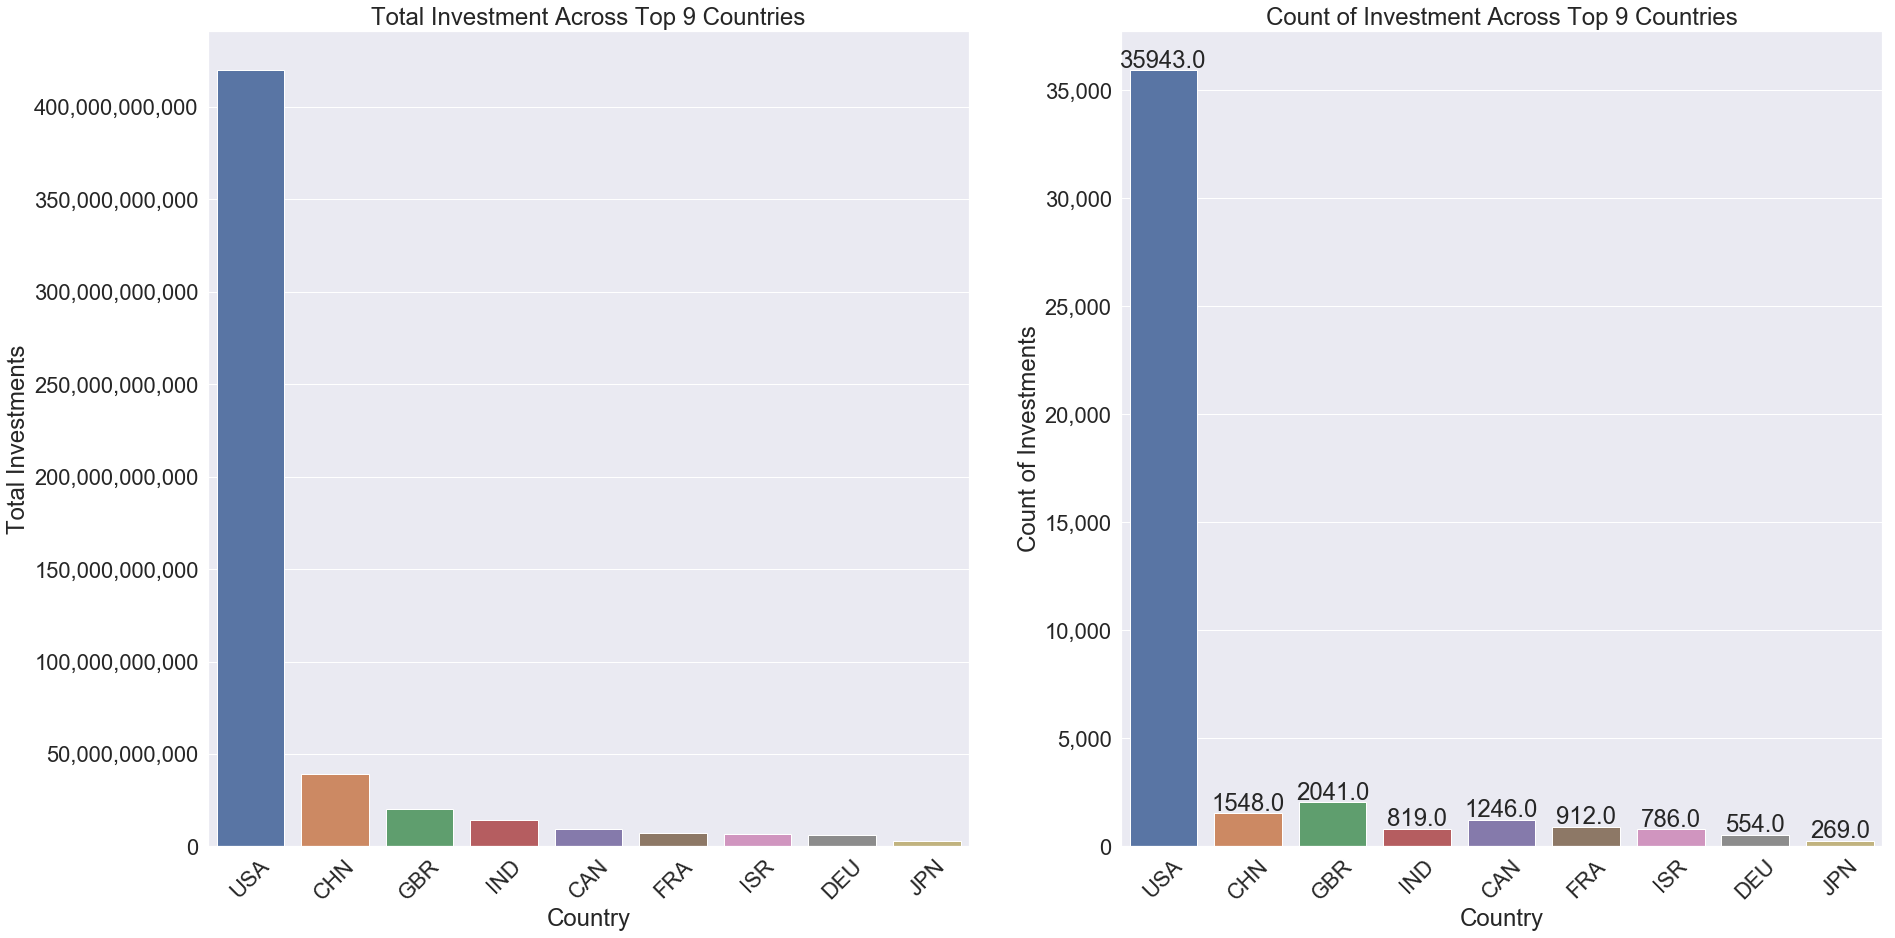

In [82]:
#REF: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

plt.figure(figsize = (30,15))
sns.set(font_scale=2.0)
plt.subplot(121)
plt1 = sns.barplot(x = 'Country', y = 'Total Investments', data = top9)
plt1.get_yaxis().get_major_formatter().set_scientific(False)
plt1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation = 45)
plt.title('Total Investment Across Top 9 Countries')

plt.subplot(122)
plt1 = sns.barplot(x = 'Country', y = 'Count of Investments', data = top9)
plt1.get_yaxis().get_major_formatter().set_scientific(False)
plt1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation = 45)
for p in plt1.patches:
    plt1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Count of Investment Across Top 9 Countries')
plt.show()

- The above plots show the count of investments (right) and the total amount invested (left) across top 9 countries for funding type 'Venture'.


- We see USA, CHN, GBR has received the highest total investment amount. Since Spark Funds wants to invest only in English speaking countries, we discard CHN (China) and include IND (India) in the list of top 3 suitable countries receiving the highest investment amount.

**PLOT 2 Conclusion:**

- **For Funding type 'Venture',  the top 3 countries receiving the highest investment amount are USA, GBR, IND.**

#### PLOT 3

END GOAL: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [83]:
D1_USA_plotDf = D1_USA.pivot_table(values = 'raised_amount_usd',index = ['country_code', 'Main Sector'], aggfunc = {'count','sum'}).sort_values(by='count', ascending=False).head(3)
D2_GBR_plotDf = D2_GBR.pivot_table(values = 'raised_amount_usd',index = ['country_code', 'Main Sector'], aggfunc = {'count','sum'}).sort_values(by='count', ascending=False).head(3)
D3_IND_plotDf = D3_IND.pivot_table(values = 'raised_amount_usd',index = ['country_code', 'Main Sector'], aggfunc = {'count','sum'}).sort_values(by='count', ascending=False).head(3)

finalDf_country_sector = [D1_USA_plotDf,D2_GBR_plotDf,D3_IND_plotDf]
finalDf_country_sector = pd.concat(finalDf_country_sector).reset_index()
finalDf_country_sector.rename(columns = {'country_code':'Country', 'count':'Investment Count','sum':'Total Investment Amount'}, inplace=True)

In [84]:
finalDf_country_sector

,Country,Main Sector,Investment Count,Total Investment Amount
0,USA,Others,2950,2.632101e+10
1,USA,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
2,USA,Cleantech / Semiconductors,2350,2.163343e+10
3,GBR,Others,147,1.283624e+09
4,GBR,"Social, Finance, Analytics, Advertising",133,1.089404e+09
5,GBR,Cleantech / Semiconductors,130,1.163990e+09
6,IND,Others,110,1.013410e+09
7,IND,"Social, Finance, Analytics, Advertising",60,5.505496e+08
8,IND,"News, Search and Messaging",52,4.338345e+08


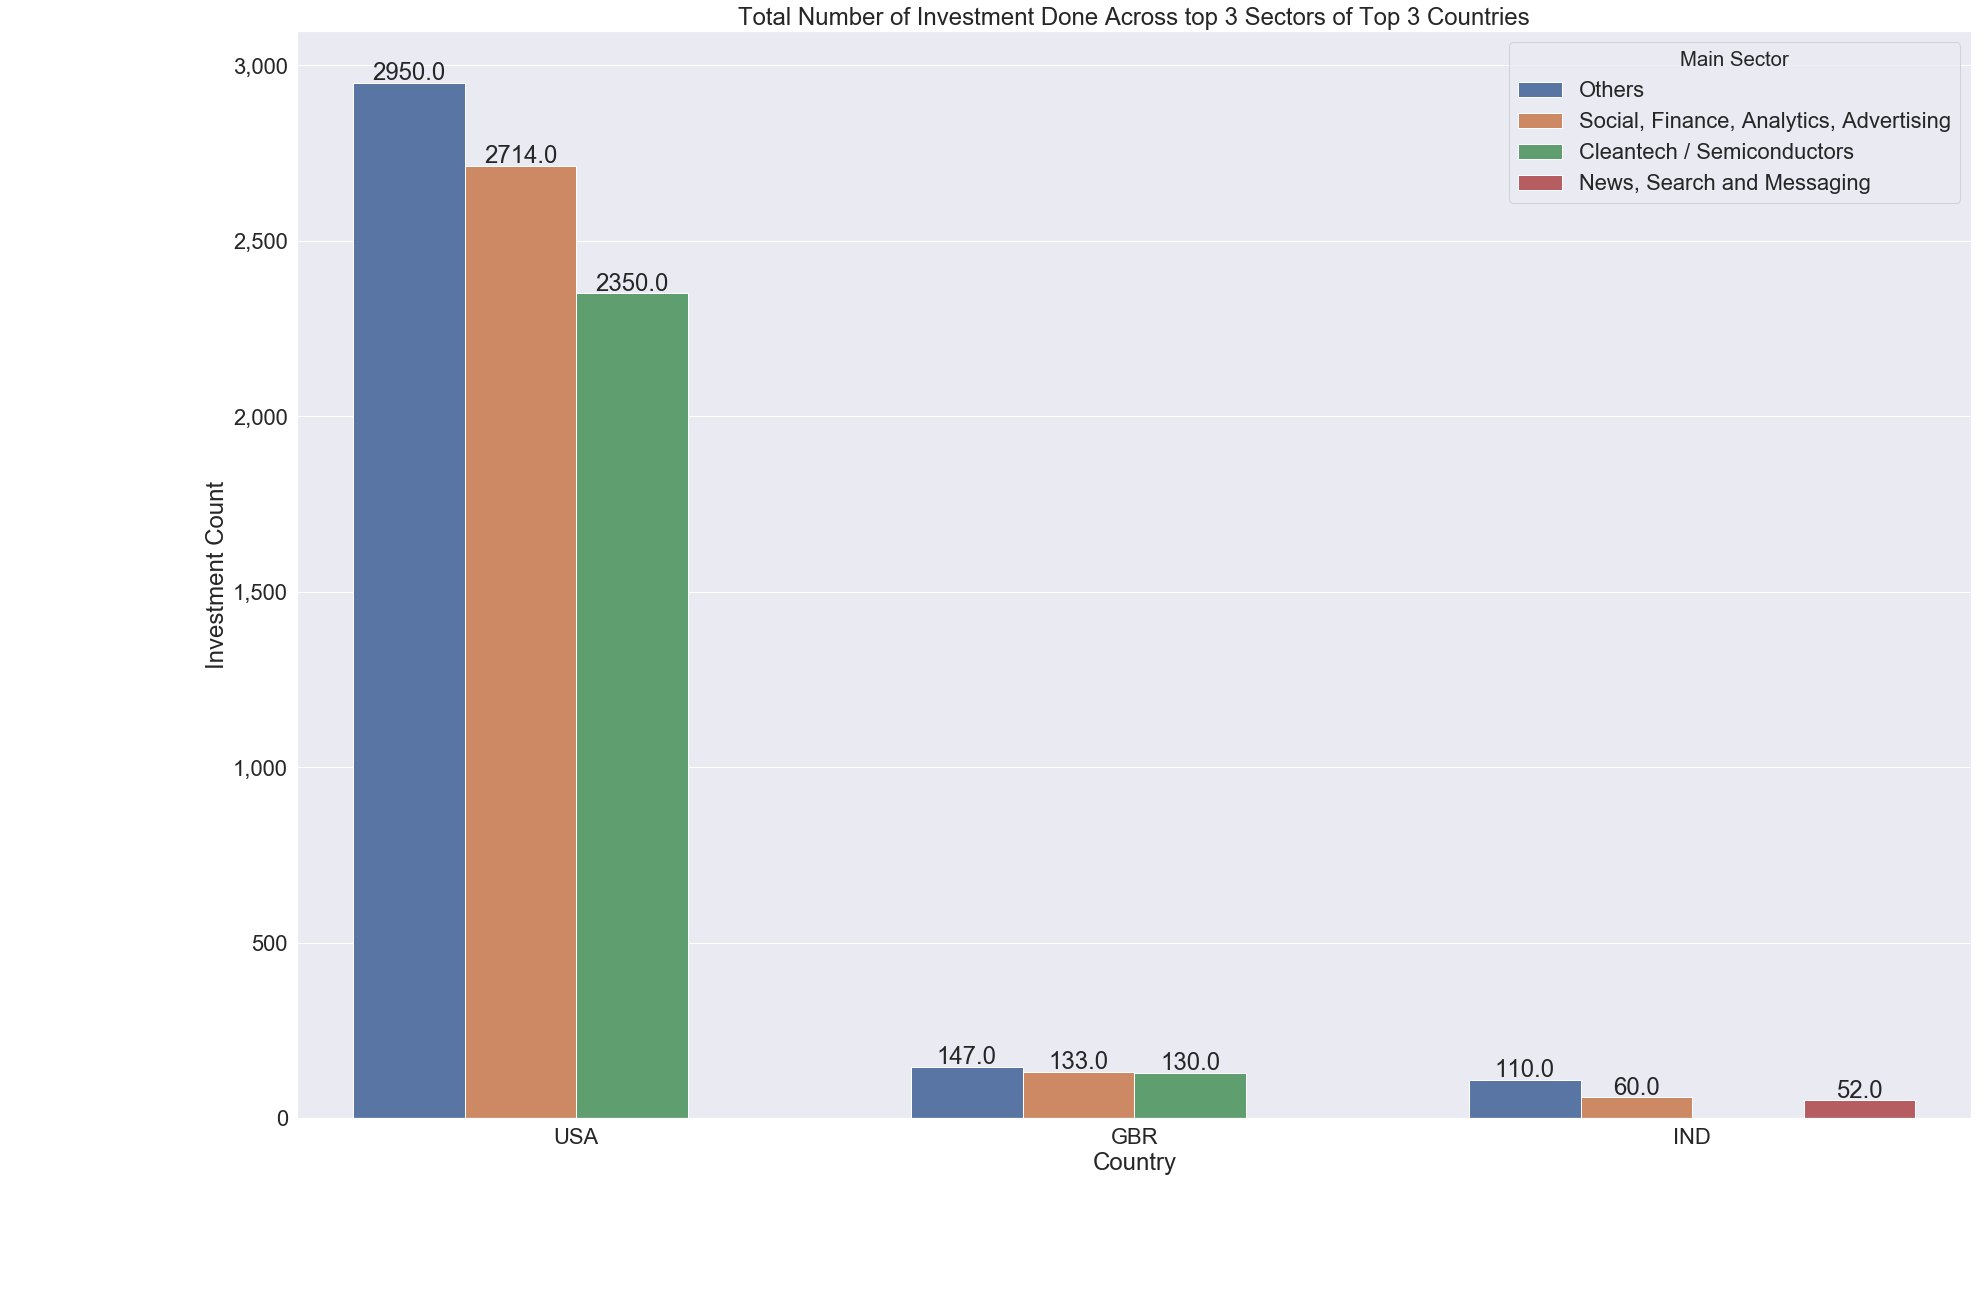

In [85]:
#REF: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/


plt.figure(figsize = (30,20))
sns.set(font_scale=2.0)
countrySectorPlot = sns.barplot(x='Country', y = 'Investment Count', hue = 'Main Sector', data = finalDf_country_sector)
countrySectorPlot.get_yaxis().get_major_formatter().set_scientific(False)
countrySectorPlot.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in countrySectorPlot.patches:
    countrySectorPlot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Total Number of Investment Done Across top 3 Sectors of Top 3 Countries')
plt.show()

- The above plot shows the count of investments for the top 3 countries across the top 3 sectors of each country.


- For all three countries the top 2 sector is same : 'Others', and 'Social, Finance, Analytics, Advertising'. In USA and GBR the third top sector is 'Cleantech / Semiconductors', while in IND the third top sector is 'News, Search and Messaging'.


- The number of investments for USA is very high as compared to GBR and IND. 


- For GBR, all the top 3 sectors received nearly the same number of investment. For IND, the second and third top sector received nearly same number of investment.